# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att4'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

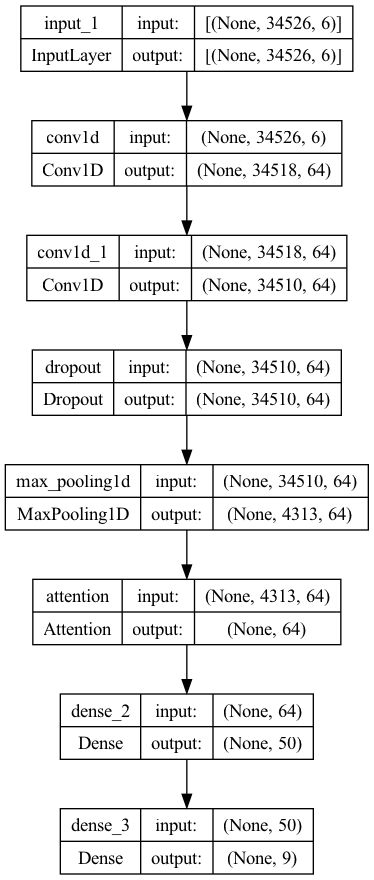

In [4]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 34526, 6)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34518, 64)         3456      
                                                                 
 conv1d_1 (Conv1D)           (None, 34510, 64)         36864     
                                                                 
 dropout (Dropout)           (None, 34510, 64)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4313, 64)          0         
 D)                                                              
                                                                 
 attention (Attention)       (None, 64)                7920      
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/100
311/311 [==============================] - 3145s 10s/step - loss: 5.2236 - ERM: -0.0121 - KDEL: -0.1678 - LMA: -0.0911 - MITO: -0.0632 - NES: -0.0225 - NIK: 0.0566 - NLS: 0.0684 - NUCP: 0.0430 - OMM: -0.0121 - val_loss: 2.4247 - val_ERM: 0.0457 - val_KDEL: 0.0338 - val_LMA: -0.3382 - val_MITO: -0.1486 - val_NES: -0.0898 - val_NIK: -0.0534 - val_NLS: -0.3460 - val_NUCP: -0.0857 - val_OMM: 0.2866
Epoch 2/100
311/311 [==============================] - 3189s 10s/step - loss: 2.3197 - ERM: 0.0840 - KDEL: -0.1819 - LMA: -0.0934 - MITO: -0.0348 - NES: -0.0216 - NIK: 0.0475 - NLS: 0.0917 - NUCP: 0.0535 - OMM: 5.5923e-04 - val_loss: 2.4172 - val_ERM: 0.0645 - val_KDEL: -0.0141 - val_LMA: -0.3691 - val_MITO: -0.0849 - val_NES: -0.1036 - val_NIK: -0.1061 - val_NLS: -0.2864 - val_NUCP: -0.1363 - val_OMM: 0.3285
Epoch 3/100
311/311 [==============================] - 3215s 10s/step - loss: 2.2865 - ERM: 0.1050 - KDEL: -0.1702 - LMA: -0.0806 - MITO: -0.0249 - NES: 0.0061 - NIK: 0.0329 - N

2023-07-11 16:50:33.138581: W tensorflow/core/framework/op_kernel.cc:1816] UNKNOWN: AttributeError: 'GeneDataLoader' object has no attribute 'rand'
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/utils/data_utils.py", line 648, in get_index
    return _SHARED_SEQUENCES[uid][i]
           ~~~~~~~~~~~~~~~~~~~~~~^^^
  File "/Users/jonasflor/Desktop/TUM/rna-localization/dataloaders/GeneDataLoader.py", line 53, in __getitem__
    if self.rand:
       ^^^^^^^^^
AttributeError: 'GeneDataLoader' object has no attribute 'rand'
"""


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/Users/jonasflor/mambaforge/

UnknownError: Graph execution error:

AttributeError: 'GeneDataLoader' object has no attribute 'rand'
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/utils/data_utils.py", line 648, in get_index
    return _SHARED_SEQUENCES[uid][i]
           ~~~~~~~~~~~~~~~~~~~~~~^^^
  File "/Users/jonasflor/Desktop/TUM/rna-localization/dataloaders/GeneDataLoader.py", line 53, in __getitem__
    if self.rand:
       ^^^^^^^^^
AttributeError: 'GeneDataLoader' object has no attribute 'rand'
"""


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/utils/data_utils.py", line 871, in get
    raise e

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/utils/data_utils.py", line 862, in get
    inputs = self.queue.get(block=True, timeout=5).get()
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/multiprocessing/pool.py", line 774, in get
    raise self._value

AttributeError: 'GeneDataLoader' object has no attribute 'rand'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_5895]

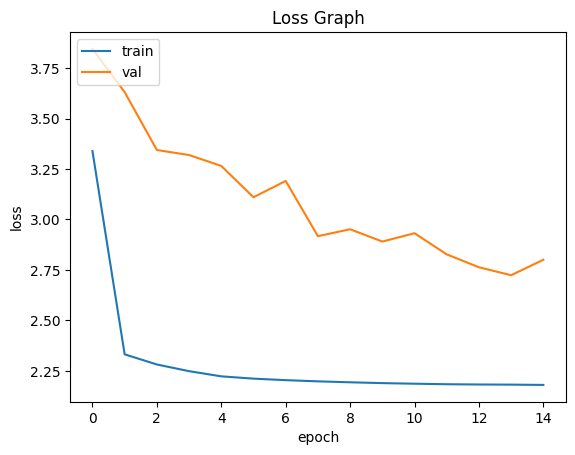

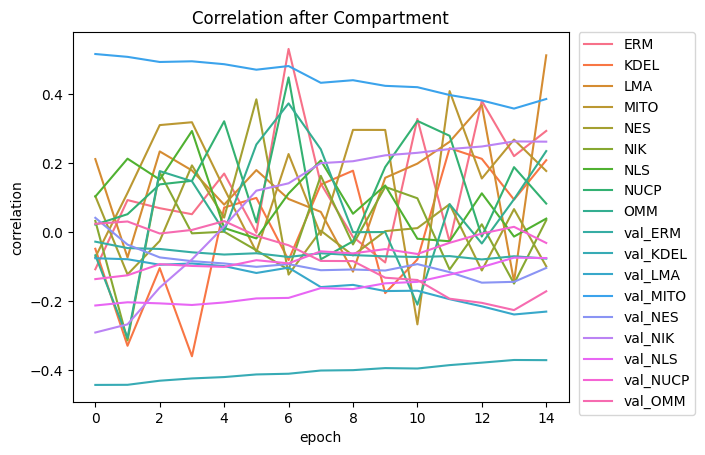

In [ ]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

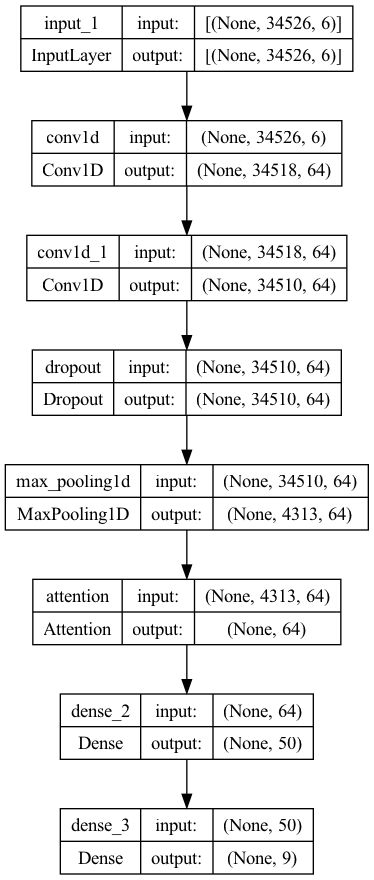

In [ ]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)